## Data Investigation : "The Lahman Baseball Database"

### Author: Pradeepta Dey
### Date: 12 March 2022

## Introduction 


<br>
The analysis is solely based on [Lahman's Baseball Database]("http://www.seanlahman.com/baseball-archive/statistics/").This database contains pitching, hitting, and fielding statistics for
Major League Baseball from 1871 through 2015.  It includes data from
the two current leagues (American and National), the four other "major" 
leagues (American Association, Union Association, Players League, and
Federal League), and the National Association of 1871-1875. 


## About the Dataset


<br>
All the Datasets are in CSV format and the files i have used are:
<ul>
    <li>Master.csv</li>
    <li>Teams.csv</li>
    <li>Batting.csv</li>
    <li>Pitching.csv</li>
    <li>Salaries.csv</li>
    <li>HallOfFame.csv</li>
</ul>    
    

<b>QUESTIONS</b> I would like to infer for from the Baseball dataset:<br>
<ol>
    <li>Relationship between Runs and combination of "which handed-batsman with what type of throw('left' or 'right')" of a Batsmen.</li><br>
    <li>Classifying teams on the basis of their Salaries and other parameters.</li><br>
    <li>Distribution of ranks of Team with Total Runs scored</li><br>
    <li>Distribution of Baseball player entering into Hall of Fame on the basis of some of their Characteristic.</li><br>
    <li>Improving the Categorisation of Players entering into Hall of Fame.</li><br>
    
</ol>    



<b>Importing necessary modules</b>


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.pylabtools import figsize
import ggplot
import matplotlib.patches as mpatches
import matplotlib.cm as cm


<b>Reading Data</b>


In [3]:
Master = pd.read_csv('datasets/Master.csv')
Teams = pd.read_csv('datasets/Teams.csv')
Batting = pd.read_csv('datasets/Batting.csv')
Pitching = pd.read_csv('datasets/Pitching.csv')
Salaries = pd.read_csv('datasets/Salaries.csv')
HallofFame = pd.read_csv('datasets/HallOfFame.csv')


Will Be Describing the <u>Cleaning of Data</u> along with the questions.


### Relationship between Runs and combination of "which handed-batsman with what type of throw('left' or 'right')" of a Batsmen.

<br>
As per the Dataset the Master table :<br>
<li><b>bats</b>&nbsp; :       &nbsp; &nbsp;&nbsp;&nbsp;    Player's batting hand (left, right, or both)  </li>       
<li><b>throws</b> &nbsp;:      &nbsp;   Player's throwing hand (left or right)</li><br>
Let's see if we have irrelevant Data


In [4]:
'''Just create a copy of Master so that we can get to the original data again!'''
master = Master
'''For the column -> 'bats'''
master.bats.unique()

array(['R', 'L', nan, 'B'], dtype=object)

In [5]:
'''Except the expected data we need to drop nan.'''
master=master[master['bats'].notnull()]
'''master.bats.unique() now gives -> ['R','L','B']'''

"master.bats.unique() now gives -> ['R','L','B']"

In [6]:
'''For the column -> 'throws' '''
master.throws.unique()

array(['R', 'L', nan, 'S'], dtype=object)

In [7]:
'''Except the expected data we need to drop nan and 'S' '''
master = master[(master['throws'].notnull()) & (master.throws!='S')]
'''master.throws.unique() now gives -> ['R','L'] '''


"master.throws.unique() now gives -> ['R','L'] "

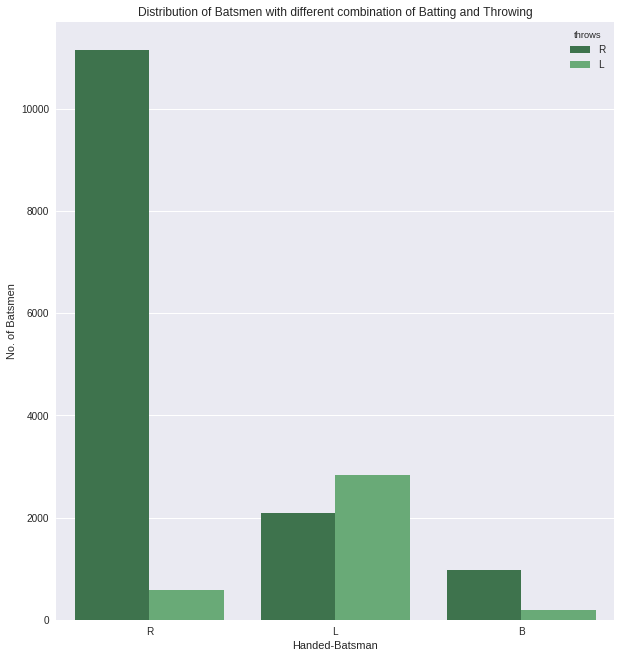

In [8]:
plt.rcParams['figure.figsize']=(10,11)
sns.countplot(x='bats',data =master,palette='Greens_d',hue='throws' )
plt.title('Distribution of Batsmen with different combination of Batting and Throwing')
plt.xlabel('Handed-Batsman')
plt.ylabel('No. of Batsmen')
plt.show()

In [9]:
'''Here I pass on the combinations of bats and throws to a function 
 stats which returns me the no. of batsmen with that combination '''
bat_combination = ['R','L','B']
throw_combination = ['R','L']
def stats(bat,throw):
    return len(master[(master.bats==bat) & (master.throws==throw)])
print('Batting   Throwing   Total')
for i in bat_combination:
    for j in throw_combination:
        print('   {}         {}       {}'.format(i,j,stats(i,j)))

Batting   Throwing   Total
   R         R       11141
   R         L       576
   L         R       2089
   L         L       2826
   B         R       979
   B         L       184



It's clearly visible from the bar graph that there are more Right('R') handed batsmen by a clear margin and that too with with the combination of ('R') hand throw.<br><br>
Next we will check out the distribution of the above combination with runs.


In [10]:
'''In order to get the runs of the batsmen we need to merge the 
Master and Batting dataset '''
runs_comb = pd.merge(Batting,master,on='playerID',how='inner')

In [11]:
'''Check for missing value'''
runs_comb['R'].isnull().values.any()

False

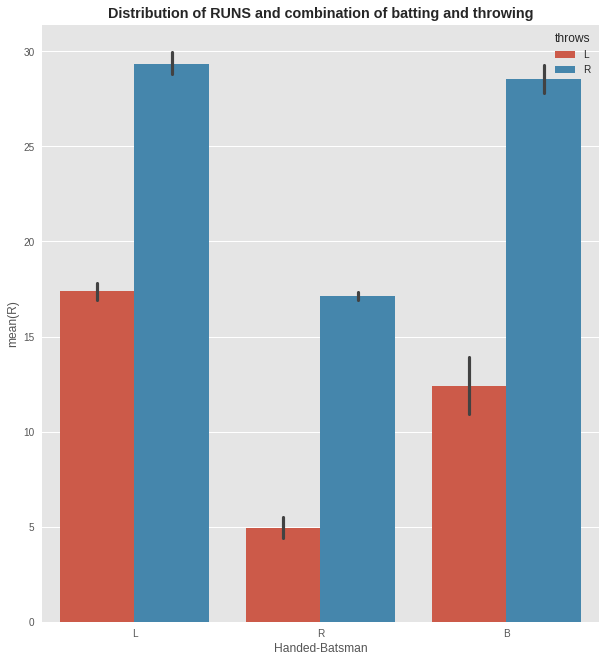

In [12]:
with plt.style.context('ggplot'):
    sns.barplot(x="bats", y="R", hue='throws', data=runs_comb)
    plt.title('Distribution of RUNS and combination of batting and throwing',fontweight='bold')
    plt.xlabel('Handed-Batsman')
    
    plt.show()


We can conclude from here that on an average:<br><br>
<b>Left</b> Hand Batsman(Right hand throw) has an edge over <b>Both</b>-Handed Batsman(Right Hand throw) in scoring Runs. <br>


### Classifying teams on the basis of their Salaries and Number of Wins and some more insights.

In [13]:
''' Grouping the Salaries file by 'yearID' and 'teamID' and summing over the salaries to get the total salary 
of a team in a particular year '''
summed_salaries = Salaries.groupby(['yearID','teamID'])['salary'].sum().reset_index()
summed_salaries.head()

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178


In [14]:
''' Combining summed_salaries and Teams to get the corresponding wins for a total salary of a team in a 
particular year '''
salary_win = pd.merge(summed_salaries,Teams,on=['teamID','yearID'],how='inner')
salary_win.head()



,yearID,teamID,salary,lgID,franchID,divID,Rank,G,Ghome,W,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1985,ATL,14807000,NL,ATL,W,5,162,81.0,66,...,197.0,0.976,Atlanta Braves,Atlanta-Fulton County Stadium,1350137.0,105,106,ATL,ATL,ATL
1,1985,BAL,11560712,AL,BAL,E,4,161,81.0,83,...,168.0,0.980,Baltimore Orioles,Memorial Stadium,2132387.0,97,97,BAL,BAL,BAL
2,1985,BOS,10897560,AL,BOS,E,5,163,81.0,81,...,161.0,0.977,Boston Red Sox,Fenway Park II,1786633.0,104,104,BOS,BOS,BOS
3,1985,CAL,14427894,AL,ANA,W,2,162,79.0,90,...,202.0,0.982,California Angels,Anaheim Stadium,2567427.0,100,100,CAL,CAL,CAL
4,1985,CHA,9846178,AL,CHW,W,3,163,81.0,85,...,152.0,0.982,Chicago White Sox,Comiskey Park,1669888.0,104,104,CHW,CHA,CHA



Checking out Correlation of salary with other parameters


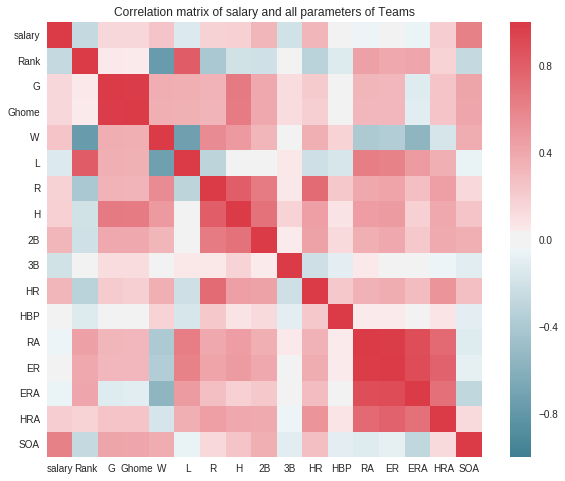

In [15]:
to_be_corr = salary_win[['salary','Rank','G','Ghome','W','L','R','H','2B','3B','HR','HBP','RA','ER','ERA','HRA','SOA']].copy()
f, ax = plt.subplots(figsize=(10,8))
corr = to_be_corr.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,ax=ax)
plt.title('Correlation matrix of salary and all parameters of Teams')
plt.show()


Although we can see a lot of correlation between many parameters we will plot a few.


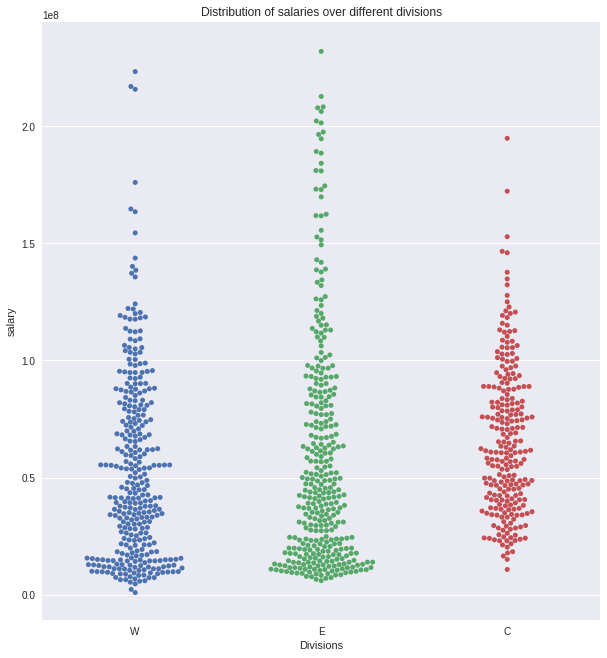

In [16]:
''' Disribution of salaries of different Divisions by 'divID' '''
sns.swarmplot(y = 'salary',x='divID',data = salary_win)
plt.title('Distribution of salaries over different divisions')
plt.xlabel('Divisions')
plt.show()


Only few players of each Division are paid high .<br>



In [17]:

def standardize_(data):
    return (data - data.mean())/data.std(ddof=0)

def convert_salaries_curve(sal):
        
        
        return pd.qcut(sal,
                       [0,0.2,0.4,0.6,0.8,1],
                       labels=[ 'Very Low','Low','Medium','High','Top'])
        
    
    
data = standardize_(salary_win['salary'])
salary_win['salary']=convert_salaries_curve(data)



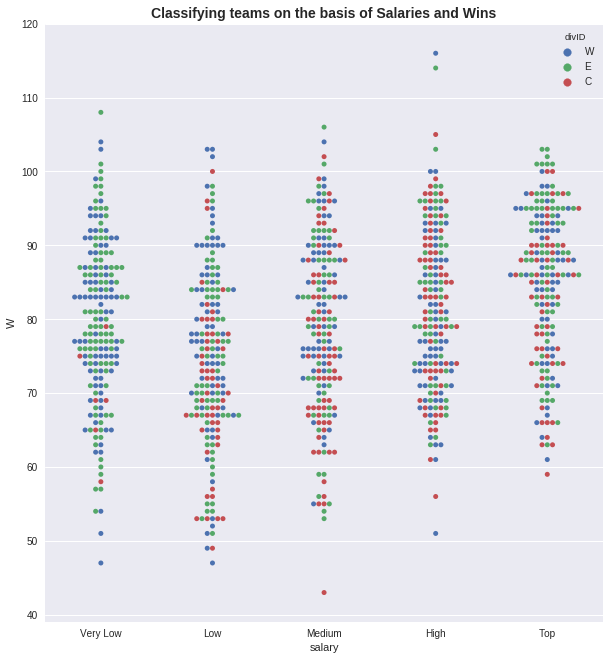

In [18]:
sns.swarmplot(x = 'salary',y = 'W',data = salary_win,hue='divID')
plt.title('Classifying teams on the basis of Salaries and Wins',fontweight='bold',fontsize=14)
plt.show()


Division C(red) usually pays High irrespective of how many matches they win.<br>
Division E(green) is a low paying division.<br>
Division W(blue) is distibuted equally over all classes.<br>
Density of top class salary is more in more no. of Wins.<br>


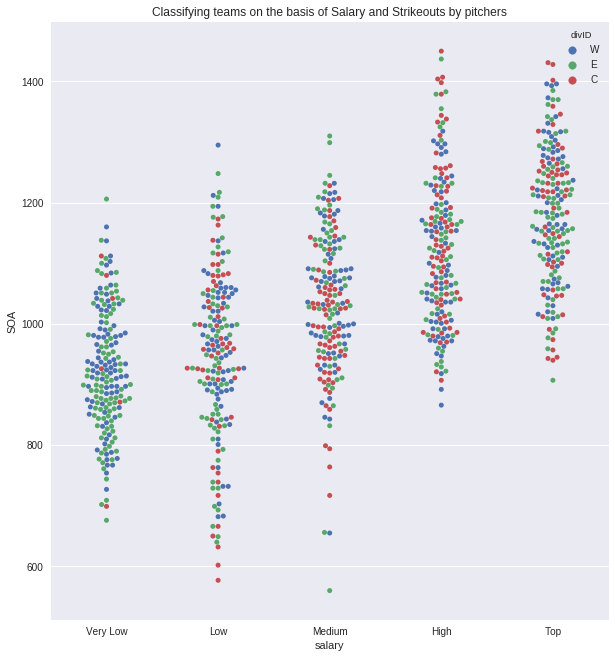

In [19]:
sns.swarmplot(x = 'salary',y = 'SOA',data = salary_win,hue='divID')
plt.title('Classifying teams on the basis of Salary and Strikeouts by pitchers')
plt.show()          

Top class teams have usually more strikeouts by pitchers followed by High class teams and so on. 

### Distribution of Top 5 ranks of Team with Total Runs scored

In [20]:
'''Function where we pass the year and colour of that year in order to differentiate between different years
   Here select teams played in that particular year and in Top 5 and then sort them by rank in order to avoid 
   overlapping while plotting. '''

def rank_vs_runs(year,col):
    data = Teams[(Teams.yearID==year) & (Teams.Rank<=5)]
    data = data.sort_values(by = 'Rank')
    
    sns.pointplot(data['Rank'],data['R'],color=col)

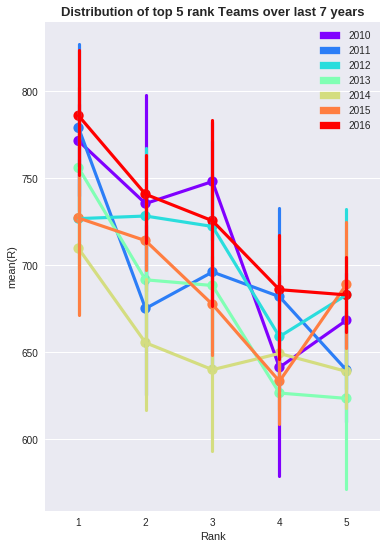

In [21]:
''' Creating colourspace for plotting using matplotlib.cm and iterating over them and simultaneously creating 
    label patch for the corresponding colour. '''
plt.rcParams['figure.figsize']=(6,9)
colors = iter(cm.rainbow(np.linspace(0, 1, 7)))
labels = []
colo = iter(cm.rainbow(np.linspace(0, 1, 7)))
for i in range(7):
    patch = mpatches.Patch(color=next(colo), label=2010+i)
    labels.append(patch)
for i in range(2010,2017):
    rank_vs_runs(i,next(colors))
    
plt.legend(handles = labels)    
plt.title('Distribution of top 5 rank Teams over last 7 years',fontweight='bold',fontsize=13)
plt.show()    


Teams with More Total Runs end up getting a better rank than the ones with lesser Total Runs relative to them.<br><br>
The above statement can't be generalised because it's clear from the plot that even the Teams with less Total Runs end up getting better rank.


### Distribution of Baseball player entering into Hall of Fame on the basis of some of their Characteristic.


<ol>
    <li><b>Batsmen :</b> Total Runs </li>
    <li><b>Pitcher :</b> Strike Outs </li>
</ol>    



In [22]:
hall_of_fame = HallofFame

In [23]:
hall_of_fame.head()

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN


In [24]:
''' Checking unique categories entering in hall of fame nominated list '''
hall_of_fame.category.unique()

array(['Player', 'Manager', 'Pioneer/Executive', 'Umpire'], dtype=object)

In [25]:
'''We have to filter out and do our analysis only on Player and store neccessary data required ahead '''
hall_player = hall_of_fame[hall_of_fame.category=='Player']
hall_player_yes = hall_player[hall_player.inducted=='Y']
hall_yes = hall_of_fame[hall_of_fame.inducted=='Y']

### Batting

In [26]:
'''Checking for null values in Runs of a Batsman '''
Batting['R'].isnull().values.any()

False

In [27]:
''' Storing total Runs of a player '''
batting_sum=Batting.groupby('playerID')['R'].apply(sum).reset_index()

In [28]:
''' Merging batting_sum containing total runs of a player and the ones nominated in Hall of Fame '''
bat_hall = pd.merge(batting_sum,hall_player,on='playerID',how='inner')
bat_hall.head()

,playerID,R,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,aaronha01,2174,1982,BBWAA,415.0,312.0,406.0,Y,Player,NaN
1,abbotji01,0,2005,BBWAA,516.0,387.0,13.0,N,Player,NaN
2,adamsba01,79,1937,BBWAA,201.0,151.0,8.0,N,Player,NaN
3,adamsba01,79,1938,BBWAA,262.0,197.0,11.0,N,Player,NaN
4,adamsba01,79,1939,BBWAA,274.0,206.0,11.0,N,Player,NaN


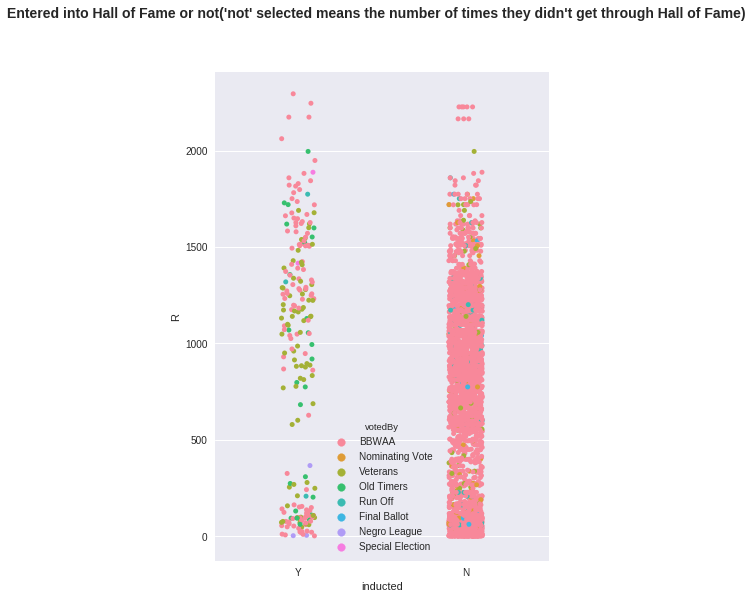

In [29]:
''' Plotting all Batsmen nominated and whether selected or not grouped by Division '''
plt.suptitle('Entered into Hall of Fame or not(\'not\' selected means the number of times they didn\'t get \
through Hall of Fame)',fontsize=14,fontweight='bold')
sns.stripplot(x='inducted',y='R',data = bat_hall,jitter=True,hue='votedBy')
plt.show()

### Pitching

In [30]:
'''Checking for null values in Strikeouts of a Pitcher'''
Pitching['SO'].isnull().values.any()

False

In [31]:
'''Storing total Strikeouts of a player'''
pitch_sum=Pitching.groupby('playerID')['SO'].apply(sum).reset_index()
pitch_sum.head()

,playerID,SO
0,aardsda01,340
1,aasedo01,641
2,abadfe01,234
3,abbeybe01,161
4,abbeych01,0


In [32]:
'''Merging pitch_sum containing total strikeouts of a player and the ones nominated in Hall of Fame'''
hall_pitch = pd.merge(pitch_sum,hall_player,on='playerID',how='inner')

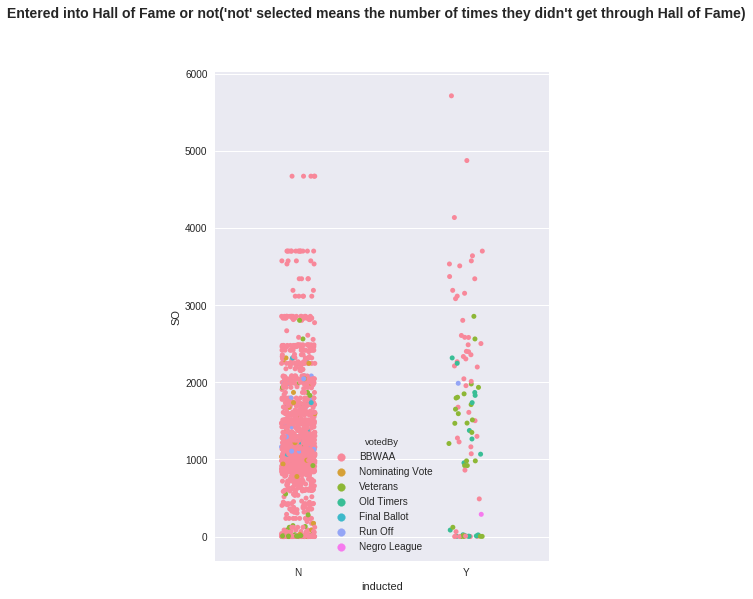

In [33]:
'''Plotting all Pitcher nominated and whether selected or not grouped by Division '''
plt.suptitle('Entered into Hall of Fame or not(\'not\' selected means the number of times they didn\'t get through Hall of Fame)',fontsize=14,fontweight='bold')
sns.stripplot(x='inducted',y='SO',data = hall_pitch,jitter=True,hue='votedBy')
plt.show()

### Improving the Categorisation of Players entering into Hall of Fame.<br>

Basically the ones already entered into Hall of Fame have the following categories:


In [34]:
hall_of_fame.category.unique()

array(['Player', 'Manager', 'Pioneer/Executive', 'Umpire'], dtype=object)


I will replace <b>'Player'</b> as:
<ul>
    <li><b>Batsman</b></li>
    <li><b>Pitcher</b></li>
    <li><b>AllRounder</b></li>
    <li><b>Unknown (Neither good performance in either of the above three mentioned categories)</b></li>
</ul>    


In [35]:
'''Storing daa of Pitchers ,Batsmen getting entering into Hall of Fame '''
hall_pitch_yes = hall_pitch[hall_pitch.inducted=='Y']
bat_hall_yes = bat_hall[bat_hall.inducted=='Y']

In [36]:
'''Merging players both in Batting and Pitching'''
bat_pitch_yes = pd.merge(hall_pitch_yes,bat_hall_yes,on='playerID',how='inner')

In [37]:
'''Calculating the mean and std of of pitchers and batsmen in the common list of pitcher and batsmen '''
common_pitch_mean = bat_pitch_yes.SO.mean()
common_pitch_std = bat_pitch_yes.SO.std(ddof=0)
common_bat_mean = bat_pitch_yes.R.mean()
common_bat_std = bat_pitch_yes.R.std(ddof=0)
'''Calculating threshold as 1 std away from mean for both pitchers and batsmen'''
threshold_pitch = abs(common_pitch_mean-common_pitch_std)
threshold_bat = abs(common_bat_mean-common_pitch_std)

In [38]:
'''all rounder'''
all_rounder = bat_pitch_yes[(bat_pitch_yes.SO>=threshold_pitch) & 
                            (bat_pitch_yes.R>=threshold_bat)]
'''Hall of Fame -> HOF'''
'''Assigning the AllRounders in the main hall player list entered in HOF'''
hall_player_yes.loc[(hall_player_yes.playerID.isin(all_rounder.playerID.values)==True),'category'] = 'AllRounder'
len(all_rounder)
hall_player_yes.head()

/home/akash/.virtualenvs/data/local/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,AllRounder,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN


In [39]:
'''Pitcher'''
pitcher = bat_pitch_yes[(bat_pitch_yes.SO>=threshold_pitch) & 
                            (bat_pitch_yes.R<threshold_bat)]
''' Assigning the Pitchers in the main hall player list entered in HOF'''
hall_player_yes.loc[(hall_player_yes.playerID.isin(pitcher.playerID.values)==True) & (hall_player_yes.category!='AllRounder')==True ,'category'] = 'Pitcher'
pitcher.head()

,playerID,SO,yearid_x,votedBy_x,ballots_x,needed_x,votes_x,inducted_x,category_x,needed_note_x,R,yearid_y,votedBy_y,ballots_y,needed_y,votes_y,inducted_y,category_y,needed_note_y
0,alexape01,2198,1938,BBWAA,262.0,197.0,212.0,Y,Player,NaN,154,1938,BBWAA,262.0,197.0,212.0,Y,Player,NaN
3,bendech01,1711,1953,Veterans,NaN,NaN,NaN,Y,Player,NaN,102,1953,Veterans,NaN,NaN,NaN,Y,Player,NaN
4,blylebe01,3701,2011,BBWAA,581.0,436.0,463.0,Y,Player,NaN,19,2011,BBWAA,581.0,436.0,463.0,Y,Player,NaN
8,brownmo01,1375,1949,Old Timers,NaN,NaN,NaN,Y,Player,NaN,93,1949,Old Timers,NaN,NaN,NaN,Y,Player,NaN
9,bunniji01,2855,1996,Veterans,NaN,NaN,NaN,Y,Player,NaN,82,1996,Veterans,NaN,NaN,NaN,Y,Player,NaN


In [40]:
'''Batsman'''
batsmen = bat_pitch_yes[(bat_pitch_yes.SO<threshold_pitch) & 
                            (bat_pitch_yes.R>=threshold_bat)]
''' Assigning the Batsmen in the main hall player list entered in HOF'''
hall_player_yes.loc[(hall_player_yes.playerID.isin(batsmen.playerID.values)==True) & ((hall_player_yes.category!='AllRounder')==True) & ((hall_player_yes.category!='Pitcher')==True),'category'] =  'Batsman'
batsmen.head()

,playerID,SO,yearid_x,votedBy_x,ballots_x,needed_x,votes_x,inducted_x,category_x,needed_note_x,R,yearid_y,votedBy_y,ballots_y,needed_y,votes_y,inducted_y,category_y,needed_note_y
1,ansonca01,1,1939,Old Timers,NaN,NaN,NaN,Y,Player,NaN,1996,1939,Old Timers,NaN,NaN,NaN,Y,Player,NaN
2,becklja01,2,1971,Veterans,NaN,NaN,NaN,Y,Player,NaN,1600,1971,Veterans,NaN,NaN,NaN,Y,Player,NaN
5,boggswa01,2,2005,BBWAA,516.0,387.0,474.0,Y,Player,NaN,1513,2005,BBWAA,516.0,387.0,474.0,Y,Player,NaN
7,broutda01,8,1945,Old Timers,NaN,NaN,NaN,Y,Player,NaN,1523,1945,Old Timers,NaN,NaN,NaN,Y,Player,NaN
10,burkeje01,84,1946,Old Timers,NaN,NaN,NaN,Y,Player,NaN,1720,1946,Old Timers,NaN,NaN,NaN,Y,Player,NaN


In [41]:
'''Unknown'''
unknown = bat_pitch_yes[(bat_pitch_yes.SO<threshold_pitch) & 
                            (bat_pitch_yes.R<threshold_bat)]
''' Assigning the Unknown in the main hall player list entered in HOF'''

hall_player_yes.loc[(hall_player_yes.playerID.isin(unknown.playerID.values)==True) & ((hall_player_yes.category!='AllRounder')==True) & ((hall_player_yes.category!='Pitcher')==True) & ((hall_player_yes.category!='Batsman')==True),'category'] = 'Unknown'
unknown.head()

,playerID,SO,yearid_x,votedBy_x,ballots_x,needed_x,votes_x,inducted_x,category_x,needed_note_x,R,yearid_y,votedBy_y,ballots_y,needed_y,votes_y,inducted_y,category_y,needed_note_y
6,bresnro01,15,1945,Old Timers,NaN,NaN,NaN,Y,Player,NaN,682,1945,Old Timers,NaN,NaN,NaN,Y,Player,NaN
61,paigesa01,288,1971,Negro League,NaN,NaN,NaN,Y,Player,NaN,2,1971,Negro League,NaN,NaN,NaN,Y,Player,NaN


In [42]:
'''rest batsman'''
rest_bat = bat_hall_yes[(bat_hall_yes.R>=abs(bat_hall_yes.R.mean()-bat_hall_yes.R.std(ddof=0)))]
''' Assigning the rest Batsmen(not included in AllRounder) in the main hall player list entered in HOF'''
hall_player_yes.loc[(hall_player_yes.playerID.isin(rest_bat.playerID.values)==True) & ((hall_player_yes.category!='AllRounder')==True),'category'] =  'Batsman'


In [43]:
'''rest pitcher'''
rest_pitch = hall_pitch_yes[(hall_pitch_yes.SO>=abs(hall_pitch_yes.SO.mean()-hall_pitch_yes.SO.std(ddof=0)))]
''' Assigning the rest Pitchers(not included in AllRounder) in the main hall player list entered in HOF'''
hall_player_yes.loc[(hall_player_yes.playerID.isin(rest_pitch.playerID.values)==True)& ((hall_player_yes.category!='AllRounder')==True),'category'] =  'Pitcher'


In [44]:
'''not_assigned
 Assigning the leftover players as Unknown as the might have got into HOF through some special means which we are 
 not sure of'''
hall_player_yes.loc[hall_player_yes.category=='Player','category'] =  'Unknown'

In [45]:
''' Assigning the categorised Players into original list of Hall of Fame including other categories'''
hall_yes.loc[hall_yes.playerID.isin(hall_player_yes.playerID.values)==True,'category']=\
hall_player_yes.loc[hall_yes.playerID.isin(hall_player_yes.playerID.values)==True,'category'] 

In [46]:
'''Checking if all 'Players' have been categorised or not'''
hall_yes.category.unique()

array(['Batsman', 'AllRounder', 'Pitcher', 'Pioneer/Executive', 'Manager',
       'Umpire', 'Unknown'], dtype=object)

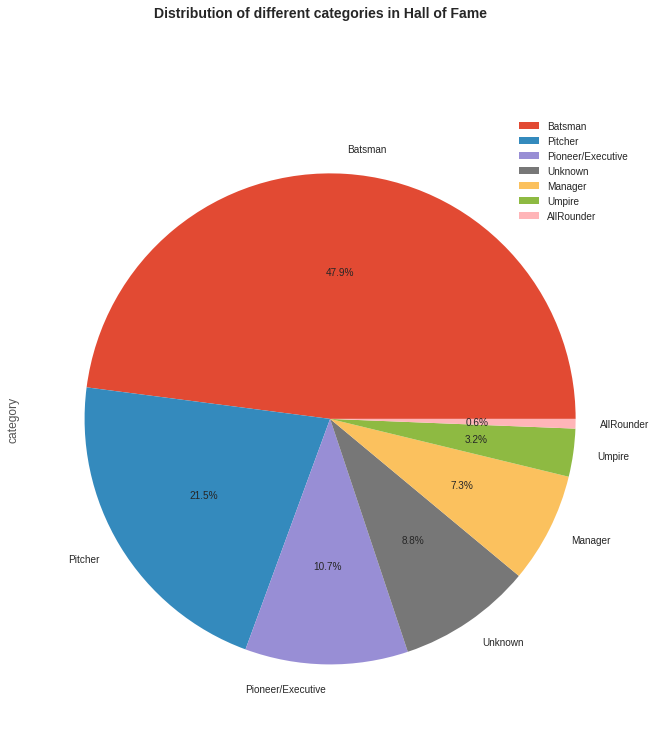

In [47]:
''' Finally plotting a pie chat using ggplot because it looks more clean '''
with plt.style.context('ggplot'):
                plt.rcParams['figure.figsize']=(11,12)
                plt.suptitle('Distribution of different categories in Hall of Fame',fontweight='bold',fontsize=14)
                hall_yes['category'].value_counts().plot(kind='pie',legend=True,autopct='%0.1f%%')
                plt.gca().set_aspect("equal")

                plt.show()


Majority of people in Hall of Fame are Batsmen followed by Pitchers and so on according to the pie chart given above.


# Conclusion


<br>
General trends of all the questions have been answered and the flow of data analysis has been documented.
<br>
I would like to improve my Categorisation of 'Unknown' and even make a model to predict minimum runs required against each opponent in order to win the match.


# References
<br>


Lahman, Sean, comp. The Lahman Baseball Database. 2014 ed. &nbsp;[link]("http://www.seanlahman.com/baseball-archive/statistics/")
<br><br>

Stackoverflow ( for Python Techniques)&nbsp;[link]("https://stackoverflow.com/">link)
<br><br>

Seaborn for Categorical plots&nbsp; [link]("http://seaborn.pydata.org/tutorial/categorical.html">link)
<br><br>
